Nama  : San Antonio Limbong

NIM   : 12S19033

# Latihan 1 Term Frequency

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
corpus = [
    'The greatest glory in living lies not in never falling, but in rising every time we fall.',
    'The way to get started is to quit talking and begin doing.',
    'If life were predictable it would cease to be life, and be without flavor.',
    'Life is what happens when you are busy making other plans.',

]

X = vectorizer.fit_transform(corpus)

Fungsi fit_transform digunakan untuk mengekstrak kosa kata atau vocabulary dan menghitung
kemunculan setiap kata dalam setiap kalimat yang diberikan

In [2]:
print(vectorizer.get_feature_names())

['and', 'are', 'be', 'begin', 'busy', 'but', 'cease', 'doing', 'every', 'fall', 'falling', 'flavor', 'get', 'glory', 'greatest', 'happens', 'if', 'in', 'is', 'it', 'lies', 'life', 'living', 'making', 'never', 'not', 'other', 'plans', 'predictable', 'quit', 'rising', 'started', 'talking', 'the', 'time', 'to', 'way', 'we', 'were', 'what', 'when', 'without', 'would', 'you']


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Fungsi get_feature_names() untuk melihat setupa kata yang terdapat pada vocabulary.

In [3]:
#retriving the matrix in the numpy form
X.toarray()

#transforming a new document according to Learn vocabulary
vectorizer.transform(['A glory.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

Fungsi toarray() digunakan untuk menampilkan matrix.
Fungsi transform() digunakan untuk merubah dokumen yang diberikan menjadi bentuk document-term matrix

# 2. Term Frequency – Inverse Document Frequency Konversi Kalimat ke N-gram

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer

#create tf-idf object
transformer = TfidfTransformer(smooth_idf=False)

#learn the vocabulary and store tf-idf sparse matrix in tfidf
tfidf = transformer.fit_transform(X)

#retriving matrix in numpy form as we did before
tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21080243, 0.        , 0.        , 0.21080243, 0.21080243,
        0.21080243, 0.        , 0.        , 0.21080243, 0.21080243,
        0.        , 0.        , 0.63240729, 0.        , 0.        ,
        0.21080243, 0.        , 0.21080243, 0.        , 0.21080243,
        0.21080243, 0.        , 0.        , 0.        , 0.        ,
        0.21080243, 0.        , 0.        , 0.14957063, 0.21080243,
        0.        , 0.        , 0.21080243, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.21871556, 0.        , 0.        , 0.30825419, 0.        ,
        0.        , 0.        , 0.30825419, 0.        , 0.        ,
        0.        , 0.        , 0.30825419, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.21871556, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3

# 3. Word2Vec

In [5]:
#importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

#Read 'alice.txt' file
sample = open("alice_in_wonderland.txt", "r")
s = sample.read()

#Replaces escape charter with space
f = s.replace("\n", " ")

data = []
#iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
    
    #tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
        
    data.append(temp)
    
#create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5)

- min_count : jumlah kata minimum yang perlu dipertimbangkan saat melatih model
- size : jumlah dari dimensi embedding
- window: jarak maksimum antara kata target dan kata disekitar kata target

In [6]:
#print result
print("Cosine similarity between 'alice'" + "and 'wonderland' - CBOW:",
     model1.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice'" + "and 'machines' - CBOW:",
     model1.similarity('alice', 'machines'))

Cosine similarity between 'alice'and 'wonderland' - CBOW: 0.99854565
Cosine similarity between 'alice'and 'machines' - CBOW: 0.9831899


Fungsi model.similarity () digunakan untuk menghitung kesamaan antara dua kata dalam kosakata

In [8]:
#Create skip gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)

#print result
print("Cosine similarity between 'alice'" + "and 'wonderland' - Skip Gram:",
     model2.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice'" + "and 'machines' - Skip Gram:",
     model2.similarity('alice', 'machines'))

Cosine similarity between 'alice'and 'wonderland' - Skip Gram: 0.9782598
Cosine similarity between 'alice'and 'machines' - Skip Gram: 0.9767585


Untuk membuat model skip-gram, kita hanya perlu menambahkan satu hyperparameter
yaitu ‘sg’ pada fungsi Word2Vec.

# 4. Plot Word Vectors Using PCA

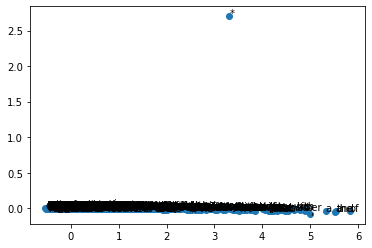

In [9]:
from sklearn.decomposition import PCA
from matplotlib import  pyplot

%matplotlib inline

#fit a 2d PCA model to the vectors
X = model1[model1.wv.vocab]
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

#create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:,1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

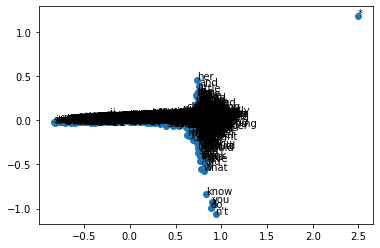

In [10]:
#fit a 2d PCA model to the vectors
X = model2[model2.wv.vocab]
pca = PCA (n_components = 2)
result = pca.fit_transform(X)

#create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

# Tugas

Dataset : https://www.kaggle.com/datasets/returnofsputnik/20newsbydate

In [11]:
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import numpy
print("numpy version: {}".format(numpy.__version__))

import nltk
print("nltk version: {}".format(nltk.__version__))

scikit-learn version: 1.0.2
numpy version: 1.21.5
nltk version: 3.7


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from sklearn.datasets import load_files
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = load_files("C:/Users/ASUS/a semester 7/PBA/Week 6/Untitled Folder/archive/20news-bydate-train", categories=categories, load_content=True, shuffle=True, encoding='latin1', decode_error='strict', random_state=42)
twenty_test = load_files("C:/Users/ASUS/a semester 7/PBA/Week 6/Untitled Folder/archive/20news-bydate-test", categories=categories, load_content=True, shuffle=True, encoding='latin1', decode_error='strict', random_state=42)

In [14]:
print (len(twenty_train.data) + len(twenty_test.data))

3759


In [15]:
print ( twenty_train.target_names)

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [16]:
print ("\n".join(twenty_train.data[0].split("\n")))

From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fung)
Subject: Re: looking for circle algorithm faster than Bresenhams
Organization: Department of Computer Science, The University of Western
	Ontario, London, Ontario, Canada
In-Reply-To: graeme@labtam.labtam.oz.au's message of Wed, 14 Apr 1993 04:49:46 GMT
	<1993Apr13.025240.8884@nwnexus.WA.COM>
	<1993Apr14.044946.12144@labtam.labtam.oz.au>
Nntp-Posting-Host: mccarthy.csd.uwo.ca
Lines: 41

>>>>> On Wed, 14 Apr 1993 04:49:46 GMT, graeme@labtam.labtam.oz.au (Graeme Gill) said:

Graeme> 	Yes, that's known as "Bresenhams Run Length Slice Algorithm for
Graeme> Incremental lines". See Fundamental Algorithms for Computer Graphics,
Graeme> Springer-Verlag, Berlin Heidelberg 1985.

> I have tried to extrapolate this to circles but I can't figure out
> how to determine the length of the slices. Any ideas?

Graeme> 	Hmm. I don't think I can help you with this, but you might
Graeme> take a look at the following:

Graeme> 	"Double-Step Incremental Gene

In [17]:
print(twenty_train.target_names[0])

alt.atheism


In [18]:
codings = list(range(len(twenty_train.target_names)))

In [19]:
target_dic = dict(zip(codings,twenty_train.target_names))

In [20]:
print(target_dic[twenty_train.target[0]])

comp.graphics


In [21]:
from nltk.stem import PorterStemmer
words = twenty_train.data[0].split()
ps = PorterStemmer()
for w in words:
    roodWord = ps.stem(w)
    print(roodWord)

from:
clipper@mccarthy.csd.uwo.ca
(khun
yee
fung)
subject:
re:
look
for
circl
algorithm
faster
than
bresenham
organization:
depart
of
comput
science,
the
univers
of
western
ontario,
london,
ontario,
canada
in-reply-to:
graeme@labtam.labtam.oz.au'
messag
of
wed,
14
apr
1993
04:49:46
gmt
<1993apr13.025240.8884@nwnexus.wa.com>
<1993apr14.044946.12144@labtam.labtam.oz.au>
nntp-posting-host:
mccarthy.csd.uwo.ca
lines:
41
>>>>>
on
wed,
14
apr
1993
04:49:46
gmt,
graeme@labtam.labtam.oz.au
(graem
gill)
said:
graeme>
yes,
that'
known
as
"bresenham
run
length
slice
algorithm
for
graeme>
increment
lines".
see
fundament
algorithm
for
comput
graphics,
graeme>
springer-verlag,
berlin
heidelberg
1985.
>
i
have
tri
to
extrapol
thi
to
circl
but
i
can't
figur
out
>
how
to
determin
the
length
of
the
slices.
ani
ideas?
graeme>
hmm.
i
don't
think
i
can
help
you
with
this,
but
you
might
graeme>
take
a
look
at
the
following:
graeme>
"double-step
increment
gener
of
line
and
circles",
graeme>
x.
wu
and
j.
g.
r

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
tokenization = nltk.word_tokenize(roodWord)
for w in tokenization:
    print (tokenization)

['661-3515']


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_tf = count_vect.fit_transform(twenty_train.data)
print("Shape of term-frequency matrix:", X_train_tf)

Shape of term-frequency matrix:   (0, 14887)	1
  (0, 8834)	2
  (0, 21242)	2
  (0, 10337)	3
  (0, 33968)	3
  (0, 7643)	3
  (0, 19320)	4
  (0, 35592)	4
  (0, 14992)	3
  (0, 31077)	1
  (0, 27031)	1
  (0, 20474)	1
  (0, 14601)	3
  (0, 8645)	1
  (0, 4690)	3
  (0, 14049)	1
  (0, 32131)	1
  (0, 7200)	2
  (0, 23915)	1
  (0, 11159)	2
  (0, 23610)	8
  (0, 9338)	6
  (0, 28897)	2
  (0, 32142)	4
  (0, 33597)	2
  :	:
  (2256, 34741)	2
  (2256, 17180)	4
  (2256, 28058)	2
  (2256, 33081)	1
  (2256, 11687)	1
  (2256, 27692)	1
  (2256, 25655)	1
  (2256, 34312)	1
  (2256, 22764)	1
  (2256, 10635)	1
  (2256, 17049)	1
  (2256, 34924)	1
  (2256, 35346)	1
  (2256, 14281)	1
  (2256, 27749)	1
  (2256, 14277)	1
  (2256, 33410)	1
  (2256, 20842)	1
  (2256, 11618)	1
  (2256, 9900)	2
  (2256, 6754)	1
  (2256, 28926)	1
  (2256, 13765)	1
  (2256, 21515)	1
  (2256, 28927)	1


In [24]:
print ("Number of training documents:",len(twenty_train.data))

Number of training documents: 2257


In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
print("Shape of term frequency-inverse document frequency matrix:", X_train_tfidf.shape)

Shape of term frequency-inverse document frequency matrix: (2257, 35788)


# Basic Naive Bayes Model

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mod = MultinomialNB()
mod.fit(X_train_tfidf, twenty_train.target)
print(mod)

MultinomialNB()


In [27]:
X_test_tf = count_vect.transform(twenty_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)

predicted = mod.predict(X_test_tfidf)

In [28]:
print("Accuracy:", accuracy_score(twenty_test.target, predicted))

Accuracy: 0.8348868175765646


In [29]:
from sklearn.metrics import classification_report
print(classification_report(twenty_test.target,
                           predicted,
                           target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



In [30]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB()),])
mod = pipe.fit(twenty_train.data, twenty_train.target)

predicted = mod.predict(twenty_test.data)
print("accuracy:", accuracy_score(twenty_test.target, predicted))

accuracy: 0.8348868175765646


# An Improved Naive Bayes Model

In [31]:
pipe = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB()),])

mod = pipe.fit(twenty_train.data, twenty_train.target)

predicted = mod.predict(twenty_test.data)

print(classification_report(twenty_test.target,
                           predicted,
                           target_names = twenty_test.target_names))

print("Accuracy:", accuracy_score(twenty_test.target, predicted))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.72      0.83       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.95      0.88      0.92       396
soc.religion.christian       0.76      0.97      0.85       398

              accuracy                           0.89      1502
             macro avg       0.91      0.88      0.89      1502
          weighted avg       0.90      0.89      0.89      1502

Accuracy: 0.8894806924101198


# Performance Evaluation

## Precision

In [32]:
from sklearn.metrics import precision_score
y_true = twenty_test.target
y_pred = predicted

print("Macro Average Precision:",precision_score(y_true,y_pred, average='macro'))
print("Micro Average Precision:",precision_score(y_true,y_pred, average='micro'))
print("Weighted Average Precision:",precision_score(y_true,y_pred, average='weighted'))

Macro Average Precision: 0.9079419539278434
Micro Average Precision: 0.8894806924101198
Weighted Average Precision: 0.9045424092926376


## Recall

In [33]:
from sklearn.metrics import recall_score
y_true = twenty_test.target
y_pred = predicted

print("Macro Average Recall:",recall_score(y_true,y_pred, average='macro'))
print("Micro Average Recall:",recall_score(y_true,y_pred, average='micro'))
print("Weighted Average Recall:",recall_score(y_true,y_pred, average='weighted'))

Macro Average Recall: 0.8815852145928588
Micro Average Recall: 0.8894806924101198
Weighted Average Recall: 0.8894806924101198


## F1-Score

In [34]:
from sklearn.metrics import f1_score
y_true = twenty_test.target
y_pred = predicted

print("Macro Average f1_score:",f1_score(y_true,y_pred, average='macro'))
print("Micro Average f1_score:",f1_score(y_true,y_pred, average='micro'))
print("Weighted Average f1_score:",f1_score(y_true,y_pred, average='weighted'))

Macro Average f1_score: 0.8867616617107978
Micro Average f1_score: 0.8894806924101198
Weighted Average f1_score: 0.8894459785761988
